In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, uniform

In [2]:
df=pd.read_csv("emails.csv")

In [3]:
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


## Data Exploration

In [4]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [5]:
df['e'].dtype

dtype('int64')

In [6]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [7]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [8]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


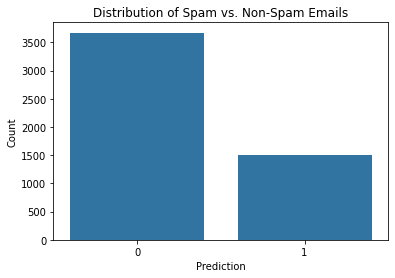

In [9]:
# Plotting the distribution of spam vs. non-spam emails
sns.countplot(x='Prediction', data=df)
plt.title('Distribution of Spam vs. Non-Spam Emails')
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.show()


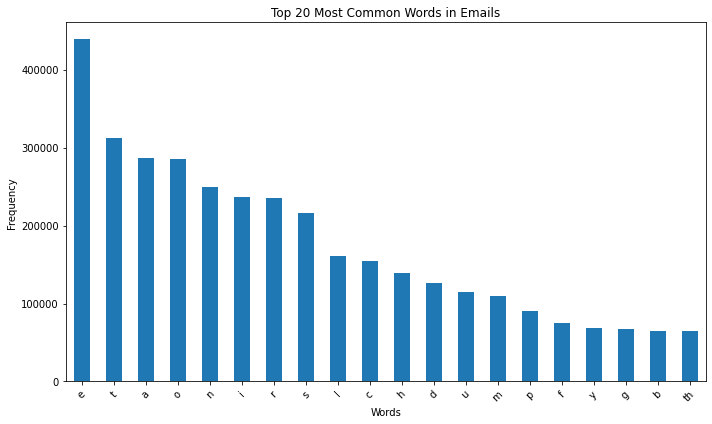

In [10]:
# Summing up word frequencies across all emails
word_freq = df.iloc[:, 1:].sum(axis=0)  # Summing columns excluding the first 'Email No.' column

# Visualizing word frequencies for the most common words
plt.figure(figsize=(10, 6))
word_freq.sort_values(ascending=False).head(20).plot(kind='bar')
plt.title('Top 20 Most Common Words in Emails')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

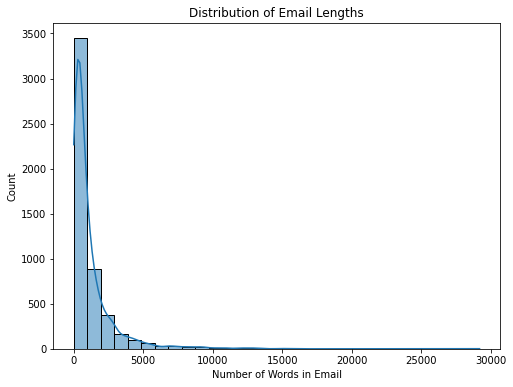

In [11]:
email_lengths = df.iloc[:, 1:].sum(axis=1)  # Summing row-wise, excluding the first 'Email No.' column

plt.figure(figsize=(8, 6))
sns.histplot(email_lengths, bins=30, kde=True)
plt.title('Distribution of Email Lengths')
plt.xlabel('Number of Words in Email')
plt.ylabel('Count')
plt.show()

In [12]:
correlation = df.corr()['Prediction'].iloc[1:]  # Assuming 'Prediction' is the first column

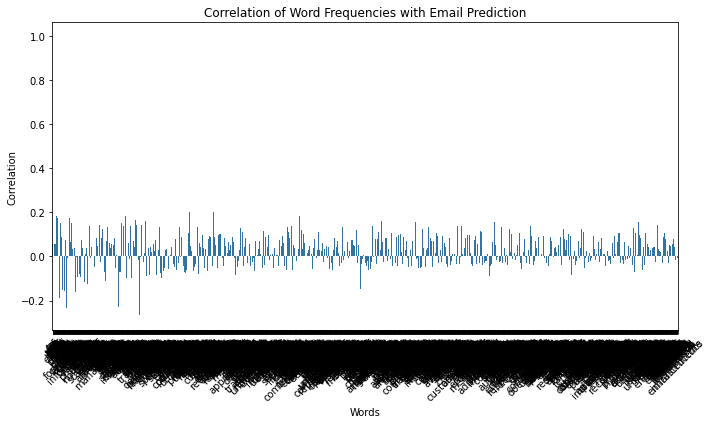

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.index, y=correlation.values)
plt.title('Correlation of Word Frequencies with Email Prediction')
plt.xlabel('Words')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Dimensionality Reduction through PCA

In [14]:
X = df.iloc[:, 1:-1]  # Exclude 'Email No.' and 'Prediction' columns
y = df['Prediction']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=0.30)  # Retain 30% of the variance
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)


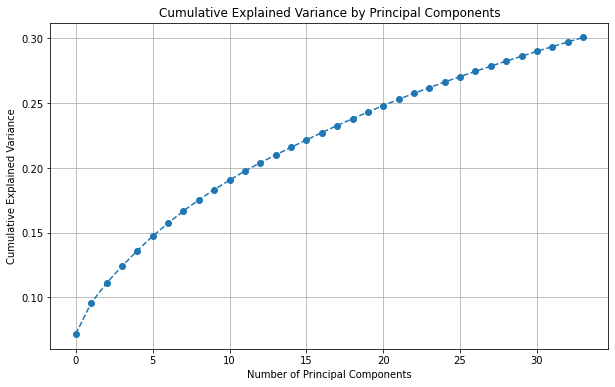

In [15]:
# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [16]:
n_components_selected = pca.n_components_
print(f"Number of principal components selected to retain 30% variance: {n_components_selected}")

Number of principal components selected to retain 30% variance: 34


In [17]:
# X_pca now contains the reduced dimensions
print("Shape of the data after PCA:", X_pca.shape)

Shape of the data after PCA: (5172, 34)


## Logistic Regression

In [55]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

# Train a Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]

In [56]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

Logistic Regression Model Performance:
Accuracy: 0.9507
Precision: 0.9164
Recall: 0.9133
F1-score: 0.9149
AUC-ROC: 0.9848


## Random Forest

In [20]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)

In [21]:
print(f"\nRandom Forest Model Performance:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")
print(f"AUC-ROC: {roc_auc_rf:.4f}")


Random Forest Model Performance:
Accuracy: 0.9662
Precision: 0.9288
Recall: 0.9567
F1-score: 0.9425
AUC-ROC: 0.9940


## Hyperparameter tuning

### Grid Search

In [57]:
# hyperparameters which im going to try for Logistic Regression
logreg_params = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 10],
    'solver': ['lbfgs', 'sag'],
    'max_iter': [ 10000, 20000, 50000]
}

In [61]:
# hyperparameters for Random Forest
rf_params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [59]:
# Grid Search for Logistic Regression
grid_search_logreg = GridSearchCV(LogisticRegression(random_state=42), logreg_params_filtered, cv=5, scoring='accuracy')
grid_search_logreg.fit(X_train, y_train)

print(f"Best parameters for Logistic Regression: {grid_search_logreg.best_params_}")
print(f"Best score for Logistic Regression: {grid_search_logreg.best_score_}")

Best parameters for Logistic Regression: {'C': 10, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'lbfgs'}
Best score for Logistic Regression: 0.9473035650655124


In [62]:
# Grid Search for Random Forest
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best score for Random Forest: {grid_search_rf.best_score_}")

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best score for Random Forest: 0.9651913966434759


### Random search

In [97]:
# Random Search for Logistic Regression
logreg_random_params = {
    'penalty': ['l2'],
    'C': uniform(0.1, 10),
    'solver': ['liblinear', 'saga'],
    'max_iter': randint(10000, 15000)
}

In [98]:
# Random Search for Random Forest
rf_random_params = {
    'n_estimators': randint(100, 1000),
    'max_depth': [30, 40, 50],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

In [99]:
# Random Search for Logistic Regression
random_search_logreg = RandomizedSearchCV(LogisticRegression(random_state=42), logreg_random_params, n_iter=5, cv=3, scoring='accuracy', random_state=42)
random_search_logreg.fit(X_train, y_train)

print(f"Best parameters for Logistic Regression (Random Search): {random_search_logreg.best_params_}")
print(f"Best score for Logistic Regression (Random Search): {random_search_logreg.best_score_}")


Best parameters for Logistic Regression (Random Search): {'C': 7.41993941811405, 'max_iter': 13772, 'penalty': 'l2', 'solver': 'liblinear'}
Best score for Logistic Regression (Random Search): 0.9489968576262994


In [100]:
# Random Search for Random Forest
random_search_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_random_params, n_iter=5, cv=3, scoring='accuracy', random_state=42)
random_search_rf.fit(X_train, y_train)

print(f"Best parameters for Random Forest (Random Search): {random_search_rf.best_params_}")
print(f"Best score for Random Forest (Random Search): {random_search_rf.best_score_}")

Best parameters for Random Forest (Random Search): {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 763}
Best score for Random Forest (Random Search): 0.9613246313753928


## Evaluation with best hyperparameters

In [101]:
# Logistic Regression with best parameters from Grid Search
best_logreg = LogisticRegression(**grid_search_logreg.best_params_, random_state=42)
best_logreg.fit(X_train, y_train)
y_pred_best_logreg = best_logreg.predict(X_test)
y_proba_best_logreg = best_logreg.predict_proba(X_test)[:, 1]

# Evaluate
accuracy_best_logreg = accuracy_score(y_test, y_pred_best_logreg)
precision_best_logreg = precision_score(y_test, y_pred_best_logreg)
recall_best_logreg = recall_score(y_test, y_pred_best_logreg)
f1_best_logreg = f1_score(y_test, y_pred_best_logreg)
roc_auc_best_logreg = roc_auc_score(y_test, y_proba_best_logreg)

print(f"Best Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy_best_logreg:.4f}")
print(f"Precision: {precision_best_logreg:.4f}")
print(f"Recall: {recall_best_logreg:.4f}")
print(f"F1-score: {f1_best_logreg:.4f}")
print(f"AUC-ROC: {roc_auc_best_logreg:.4f}")

Best Logistic Regression Model Performance:
Accuracy: 0.9527
Precision: 0.9169
Recall: 0.9200
F1-score: 0.9185
AUC-ROC: 0.9847


In [102]:
# Random Forest with best parameters from Grid Search
best_rf = RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)
best_rf.fit(X_train, y_train)
y_pred_best_rf = best_rf.predict(X_test)
y_proba_best_rf = best_rf.predict_proba(X_test)[:, 1]

# Evaluate
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
precision_best_rf = precision_score(y_test, y_pred_best_rf)
recall_best_rf = recall_score(y_test, y_pred_best_rf)
f1_best_rf = f1_score(y_test, y_pred_best_rf)
roc_auc_best_rf = roc_auc_score(y_test, y_proba_best_rf)

print(f"\nBest Random Forest Model Performance:")
print(f"Accuracy: {accuracy_best_rf:.4f}")
print(f"Precision: {precision_best_rf:.4f}")
print(f"Recall: {recall_best_rf:.4f}")
print(f"F1-score: {f1_best_rf:.4f}")
print(f"AUC-ROC: {roc_auc_best_rf:.4f}")


Best Random Forest Model Performance:
Accuracy: 0.9681
Precision: 0.9293
Recall: 0.9633
F1-score: 0.9460
AUC-ROC: 0.9943
